# 第10章

## 90. データの準備
機械翻訳のデータセットをダウンロードせよ．訓練データ，開発データ，評価データを整形し，必要に応じてトークン化などの前処理を行うこと．ただし，この段階ではトークンの単位として形態素（日本語）および単語（英語）を採用せよ．

In [4]:
!wget http://www.phontron.com/kftt/download/kftt-data-1.0.tar.gz

--2022-06-17 10:09:16--  http://www.phontron.com/kftt/download/kftt-data-1.0.tar.gz
Resolving www.phontron.com (www.phontron.com)... 208.113.196.149
Connecting to www.phontron.com (www.phontron.com)|208.113.196.149|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99246893 (95M) [application/gzip]
Saving to: ‘kftt-data-1.0.tar.gz’

kftt-data-1.0.tar.g 100%[===================>]  94.65M  16.8MB/s    in 7.6s    

2022-06-17 10:09:24 (12.4 MB/s) - ‘kftt-data-1.0.tar.gz’ saved [99246893/99246893]



In [6]:
!tar zxvf kftt-data-1.0.tar.gz 

kftt-data-1.0/
kftt-data-1.0/data/
kftt-data-1.0/data/orig/
kftt-data-1.0/data/orig/kyoto-tune.en
kftt-data-1.0/data/orig/kyoto-dev.ja
kftt-data-1.0/data/orig/kyoto-dev.en
kftt-data-1.0/data/orig/kyoto-train.en
kftt-data-1.0/data/orig/kyoto-tune.ja
kftt-data-1.0/data/orig/kyoto-train.ja
kftt-data-1.0/data/orig/kyoto-test.ja
kftt-data-1.0/data/orig/kyoto-test.en
kftt-data-1.0/data/tok/
kftt-data-1.0/data/tok/kyoto-tune.en
kftt-data-1.0/data/tok/kyoto-dev.ja
kftt-data-1.0/data/tok/kyoto-train.cln.en
kftt-data-1.0/data/tok/kyoto-dev.en
kftt-data-1.0/data/tok/kyoto-train.en
kftt-data-1.0/data/tok/kyoto-tune.ja
kftt-data-1.0/data/tok/kyoto-train.cln.ja
kftt-data-1.0/data/tok/kyoto-train.ja
kftt-data-1.0/data/tok/kyoto-test.ja
kftt-data-1.0/data/tok/kyoto-test.en
kftt-data-1.0/README.txt


In [7]:
!mkdir 
!mkdir kyoto
!cp -r kftt-data-1.0/data/tok/kyoto* ./kyoto
!rm -rf kyoto/kyoto*cln* kyoto/kyoto*tune* 
!mkdir kyoto/kyoto-bin

mkdir: missing operand
Try 'mkdir --help' for more information.


In [38]:
!head -n 10 kyoto/kyoto-test.ja > test10.ja 
!head -n 10 kyoto/kyoto-test.en > test10.en

In [ ]:
for file in ['kftt-data-1.0/data/tok/kyoto-train.ja', 'kftt-data-1.0/data/tok/kyoto-train.en',
             'kftt-data-1.0/data/tok/kyoto-dev.ja', 'kftt-data-1.0/data/tok/kyoto-dev.en',
             'kftt-data-1.0/data/tok/kyoto-test.ja', 'kftt-data-1.0/data/tok/kyoto-test.en',
            ]:
    with open(file) as f:
        

## 91. 機械翻訳モデルの訓練
90で準備したデータを用いて，ニューラル機械翻訳のモデルを学習せよ（ニューラルネットワークのモデルはTransformerやLSTMなど適当に選んでよい）．

fairseq：フェイスブックが開発元の機械翻訳用のフレームワーク, pytorchがベースとなっている。
[fairseq](https://qiita.com/keita_M/items/3a7401ef48df3ec92b6f)使い方

* fairseq-preprocess: データセットの前処理
* fairseq-train: モデルの学習
* fairseq-generate: 与えられたテストセットに対して学習済みモデルから出力を生成
* fiarseq-interactive: インタラクティブに学習済みモデルから出力を生成
* fairseq-score: BLEUスコアを計算 

[fairseq-preprocessドキュメント](https://fairseq.readthedocs.io/en/latest/command_line_tools.html?highlight=fairseq-preprocess%20#fairseq-preprocess)


|オプション|説明|
|:--:|:--|
|train/valid/testpref|各データのパスプレフィックス|
|source/target-lang|ソース・ターゲットのデータの拡張子|
|destdir|バイナリ化したデータの保存先ディレクトリ|
|tokenize|トークナイザー|
|bpe|BPEを行うトークナイザー|

BPEとはByte Pair Encodingの頭文字であり、文書における低頻度の単語をさらに分割することで、低頻度の単語もうまく扱えるようにする手法

In [9]:
!fairseq-preprocess --source-lang ja --target-lang en \
   --trainpref kyoto/kyoto-train \
   --validpref kyoto/kyoto-dev \
   --testpref kyoto/kyoto-test \
   --tokenizer space \
   --destdir kyoto/kyoto-bin 

2022-08-06 09:28:02 | INFO | fairseq_cli.preprocess | Namespace(aim_repo=None, aim_run_hash=None, align_suffix=None, alignfile=None, all_gather_list_size=16384, amp=False, amp_batch_retries=2, amp_init_scale=128, amp_scale_window=None, azureml_logging=False, bf16=False, bpe=None, cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='kyoto/kyoto-bin', dict_only=False, empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_no_flatten_grads=False, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_file=None, log_format=None, log_interval=100, lr_scheduler='fixed', memory_efficient_bf16=False, memory_efficient_fp16=False, min_loss_scale=0.0001, model_parallel_size=1, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, on_cpu_convert_precision=False, only_source=False, optimizer=None, padding_factor=8, plasma_path='/tmp/plasma', profile=False, quantization_config_path=None, reset_logging=False, scoring='bleu', seed=1, simul_type=None, source_lang=

[tasksオプション](https://fairseq.readthedocs.io/en/v0.10.2/tasks.html)


|オプション|説明|
|:--|:--|
|--arch|使用するモデルのアーキテクチャを指定|
|--task|defaultでtranslation|
|--restore-file|事前学習済みのものをfinetuneするならファイルを指定|
|--lr|learning rateの初期値, default=0.25となってるから指定することを推奨|
|--warmup-updates|このパラメータの回数分ミニバッチを処理した段階でのlrが最大値になる|
|--max-epoch|epoch数の指定, 指定しないと永遠に学習を続けるので適当に値を入れておくといい|
|--eval-bleu|BLEUで評価|
|--eval-bleu-detok|detokenizeする分割トークン|
|--eval-bleu-detok-args|args for building the tokenizer, if needed|
|--eval-bleu-remove-bpe|remove BPE before computing BLEU|
|--best-checkpoint-metric|入出力で使用するembeddingを共有する|
|--maximize-best-checkpoint-metric|最良チェックポイントを保存するために、最大の行列値を選択|
|--fp16|半浮動小数点を使用し、データ量を削減・スループットの向上|
|--no-epoch-checkpoints|最後と最良のcheckpointだけを保存|

In [ ]:
!CUDA_VISIBLE_DEVICES=2 fairseq-train kyoto/kyoto-bin \
    --save-dir checkpoints/kyoto \
    --tensorboard-logdir tensorboard/kyoto \
    --arch transformer --task translation \
	--share-decoder-input-output-embed \
 	--optimizer adam --adam-betas '(0.9, 0.98)' --clip-norm 0.0 \
	--lr 5e-4 --lr-scheduler inverse_sqrt --warmup-updates 4000 \
	--criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
	--dropout 0.3 --weight-decay 0.0001 \
	--max-tokens 4096 \
    --eval-bleu \
    --eval-bleu-args '{"beam": 5, "max_len_a": 1.2, "max_len_b": 10}' \
    --eval-bleu-detok space \
    --best-checkpoint-metric bleu --maximize-best-checkpoint-metric \
	--fp16 \
    --max-epoch 10
    --no-epoch-checkpoints

## 92.機械翻訳モデルの適用
91で学習したニューラル機械翻訳モデルを用い，与えられた（任意の）日本語の文を英語に翻訳するプログラムを実装せよ．

fairseq-interactiveの出力
```
S-0	曹洞 宗 の 開祖 。
W-0	0.618	seconds
H-0	-1.0414628982543945	He was the founder of the Rinzai Sect .
D-0	-1.0414628982543945	He was the founder of the Rinzai Sect .
P-0	-3.4044 -0.5500 -0.4172 -0.7782 -0.0934 -0.3429 -2.5765 -0.9562 -1.2363 -0.0595
```

* S: 入力文
* W: 推論時間
* H: トークン化された推論結果
* D: デトークナイズされた推論結果
* P: トークン毎の確率



In [12]:
!fairseq-interactive kyoto/kyoto-bin \
    --path checkpoints/kyoto/checkpoint_best.pt  \
    --input kyoto/kyoto-test.ja \
    --task translation \
    | grep '^H' | cut -f3 > 92.out


2022-08-06 12:13:50 | INFO | fairseq_cli.interactive | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': False, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': False, 'suppress_crashes': False, 'use_plasma_view': False, 'plasma_path': '/tmp/plasma'}, 'common_eval': {'_na

## 93. BLEUスコアの計測
91で学習したニューラル機械翻訳モデルの品質を調べるため，評価データにおけるBLEUスコアを測定せよ．

In [13]:
!fairseq-score --sys 92.out --ref kyoto/kyoto-test.en

Namespace(ignore_case=False, order=4, ref='kyoto/kyoto-test.en', sacrebleu=False, sentence_bleu=False, sys='92.out')
BLEU4 = 6.53, 34.0/9.6/3.9/2.0 (BP=0.921, ratio=0.924, syslen=24695, reflen=26734)


## 94. ビーム探索
91で学習したニューラル機械翻訳モデルで翻訳文をデコードする際に，ビーム探索を導入せよ．ビーム幅を1から100くらいまで適当に変化させながら，開発セット上のBLEUスコアの変化をプロットせよ．

In [14]:
!mkdir 94

In [16]:
for N in range(1,21):
    !fairseq-interactive kyoto/kyoto-bin \
        --path checkpoints/kyoto/checkpoint_best.pt \
        --input kyoto/kyoto-test.ja \
        --task translation \
        --beam {N} \
        | grep '^H' | cut -f3 > 94/beam{N}.out

2022-08-06 13:02:14 | INFO | fairseq_cli.interactive | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': False, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': False, 'suppress_crashes': False, 'use_plasma_view': False, 'plasma_path': '/tmp/plasma'}, 'common_eval': {'_na

In [46]:
scores = []
for N in range(1,21):
    s = !fairseq-score --sys 94/beam{N}.out --ref kyoto/kyoto-test.en | grep '^B' | cut -c 9-12
    scores.append(float(s[0]))

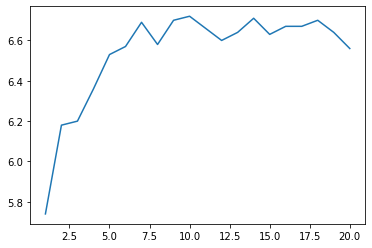

In [48]:
import matplotlib.pyplot as plt
x = range(1, 21)
plt.plot(x, scores)
plt.show()

## 95. サブワード化
トークンの単位を単語や形態素からサブワードに変更し，91-94の実験を再度実施せよ．

In [25]:
# 日本語のサブワード化
import sentencepiece as spm
import re

spm.SentencePieceTrainer.Train('--input=kftt-data-1.0/data/orig/kyoto-train.ja --model_prefix=kyoto_ja --vocab_size=16000 --character_coverage=1.0')

sp = spm.SentencePieceProcessor()
sp.Load('kyoto_ja.model')

for src, dst in [
    ('kftt-data-1.0/data/orig/kyoto-train.ja', 'kyoto/kyoto_sub-train.ja'),
    ('kftt-data-1.0/data/orig/kyoto-dev.ja', 'kyoto/kyoto_sub-dev.ja'),
    ('kftt-data-1.0/data/orig/kyoto-test.ja', 'kyoto/kyoto_sub-test.ja'),
]:
    with open(src) as f, open(dst, 'w') as g:
        for x in f:
            x = x.strip()
            x = re.sub(r'\s+', ' ', x)
            x = sp.encode_as_pieces(x)
            x = ' '.join(x)
            print(x, file=g)

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=kftt-data-1.0/data/orig/kyoto-train.ja --model_prefix=kyoto_ja --vocab_size=16000 --character_coverage=1.0
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: kftt-data-1.0/data/orig/kyoto-train.ja
  input_format: 
  model_prefix: kyoto_ja
  model_type: UNIGRAM
  vocab_size: 16000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: 

In [27]:
# 英語のサブワード化
!subword-nmt learn-bpe -s 16000 < kftt-data-1.0/data/orig/kyoto-train.en > kyoto_en.codes
!subword-nmt apply-bpe -c kyoto_en.codes < kftt-data-1.0/data/orig/kyoto-train.en > kyoto/kyoto_sub-train.en
!subword-nmt apply-bpe -c kyoto_en.codes < kftt-data-1.0/data/orig/kyoto-dev.en > kyoto/kyoto_sub-dev.en
!subword-nmt apply-bpe -c kyoto_en.codes < kftt-data-1.0/data/orig/kyoto-test.en > kyoto/kyoto_sub-test.en

100%|####################################| 16000/16000 [01:06<00:00, 242.12it/s]


--bpm sentencepieceをつけてもトークン数は変わらなかった
```
2022-08-06 22:08:17 | INFO | fairseq_cli.preprocess | [ja] Dictionary: 146832 types
2022-08-06 22:09:45 | INFO | fairseq_cli.preprocess | [ja] kyoto/kyoto-train.ja: 440288 sents, 12359715 tokens, 0.0% replaced (by <unk>)
2022-08-06 22:09:45 | INFO | fairseq_cli.preprocess | [ja] Dictionary: 146832 types
2022-08-06 22:09:45 | INFO | fairseq_cli.preprocess | [ja] kyoto/kyoto-dev.ja: 1166 sents, 28010 tokens, 0.518% replaced (by <unk>)
2022-08-06 22:09:45 | INFO | fairseq_cli.preprocess | [ja] Dictionary: 146832 types
2022-08-06 22:09:46 | INFO | fairseq_cli.preprocess | [ja] kyoto/kyoto-test.ja: 1160 sents, 29638 tokens, 0.55% replaced (by <unk>)
2022-08-06 22:09:46 | INFO | fairseq_cli.preprocess | [en] Dictionary: 221864 types
2022-08-06 22:10:48 | INFO | fairseq_cli.preprocess | [en] kyoto/kyoto-train.en: 440288 sents, 11981667 tokens, 0.0% replaced (by <unk>)
2022-08-06 22:10:48 | INFO | fairseq_cli.preprocess | [en] Dictionary: 221864 types
2022-08-06 22:10:48 | INFO | fairseq_cli.preprocess | [en] kyoto/kyoto-dev.en: 1166 sents, 25475 tokens, 1.79% replaced (by <unk>)
2022-08-06 22:10:48 | INFO | fairseq_cli.preprocess | [en] Dictionary: 221864 types
2022-08-06 22:10:48 | INFO | fairseq_cli.preprocess | [en] kyoto/kyoto-test.en: 1160 sents, 27894 tokens, 1.55% replaced (by <unk>)
```

In [28]:
!fairseq-preprocess --source-lang ja --target-lang en \
   --trainpref kyoto/kyoto_sub-train \
   --validpref kyoto/kyoto_sub-dev \
   --testpref kyoto/kyoto_sub-test \
   --tokenizer space \
   --destdir kyoto/kyoto_sub-bin 

2022-08-06 22:24:39 | INFO | fairseq_cli.preprocess | Namespace(aim_repo=None, aim_run_hash=None, align_suffix=None, alignfile=None, all_gather_list_size=16384, amp=False, amp_batch_retries=2, amp_init_scale=128, amp_scale_window=None, azureml_logging=False, bf16=False, bpe=None, cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='kyoto/kyoto_sub-bin', dict_only=False, empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_no_flatten_grads=False, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_file=None, log_format=None, log_interval=100, lr_scheduler='fixed', memory_efficient_bf16=False, memory_efficient_fp16=False, min_loss_scale=0.0001, model_parallel_size=1, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, on_cpu_convert_precision=False, only_source=False, optimizer=None, padding_factor=8, plasma_path='/tmp/plasma', profile=False, quantization_config_path=None, reset_logging=False, scoring='bleu', seed=1, simul_type=None, source_l

In [29]:
!CUDA_VISIBLE_DEVICES=2 fairseq-train kyoto/kyoto_sub-bin \
    --save-dir checkpoints/kyoto_sub \
    --tensorboard-logdir tensorboard/kyoto_sub \
    --arch transformer --task translation \
	--share-decoder-input-output-embed \
 	--optimizer adam --adam-betas '(0.9, 0.98)' --clip-norm 0.0 \
	--lr 5e-4 --lr-scheduler inverse_sqrt --warmup-updates 4000 \
	--criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
	--dropout 0.3 --weight-decay 0.0001 \
	--max-tokens 4096 \
    --eval-bleu \
    --eval-bleu-args '{"beam": 5, "max_len_a": 1.2, "max_len_b": 10}' \
    --eval-bleu-detok space \
    --eval-bleu-remove-bpe \
    --best-checkpoint-metric bleu --maximize-best-checkpoint-metric \
    --max-epoch 10 \
	--fp16 \
    --no-epoch-checkpoints

2022-08-06 22:28:46 | INFO | fairseq_cli.train | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': 'tensorboard/kyoto_sub', 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': True, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': False, 'suppress_crashes': False, 'use_plasma_view': False, 'plasma_path': '/tmp/plasma'}, 'common_

In [30]:
!fairseq-interactive kyoto/kyoto_sub-bin \
    --path checkpoints/kyoto_sub/checkpoint_best.pt  \
    --input kyoto/kyoto_sub-test.ja \
    --task translation \
    | grep '^H' | cut -f3 > 95.out

2022-08-06 23:11:17 | INFO | fairseq_cli.interactive | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': False, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': False, 'suppress_crashes': False, 'use_plasma_view': False, 'plasma_path': '/tmp/plasma'}, 'common_eval': {'_na

In [32]:
!cat 95.out | sed -r 's/(@@ )|(@@ ?$)//g' > 95-1.out

In [33]:
!fairseq-score --sys 95-1.out --ref kyoto/kyoto-test.en

Namespace(ignore_case=False, order=4, ref='kyoto/kyoto-test.en', sacrebleu=False, sentence_bleu=False, sys='95-1.out')
BLEU4 = 1.76, 18.1/3.5/0.8/0.3 (BP=0.877, ratio=0.884, syslen=23640, reflen=26734)


## 96. 学習過程の可視化
Tensorboardなどのツールを用い，ニューラル機械翻訳モデルが学習されていく過程を可視化せよ．可視化する項目としては，学習データにおける損失関数の値とBLEUスコア，開発データにおける損失関数の値とBLEUスコアなどを採用せよ．

In [ ]:
# %reload_ext tensorboard
%load_ext tensorboard
%tensorboard --logdir=./tensorboard/kyoto

![loss](./96result/96_loss.png)

![loss](./96result/96_blue.png)

## 97. ハイパー・パラメータの調整
ニューラルネットワークのモデルや，そのハイパーパラメータを変更しつつ，開発データにおけるBLEUスコアが最大となるモデルとハイパーパラメータを求めよ．

In [1]:
for l in [1e-5, 5e-4, 1e-4]:
    for d in [0.2, 0.3]:
        cmd = f"""CUDA_VISIBLE_DEVICES=2 fairseq-train kyoto/kyoto-bin \
            --save-dir checkpoints/kyoto_97/lr{l}_drop{d} \
            --tensorboard-logdir tensorboard/kyoto_97//lr{l}_drop{d} \
            --arch transformer --task translation \
            --share-decoder-input-output-embed \
            --optimizer adam --adam-betas '(0.9, 0.98)' --clip-norm 0.0 \
            --lr {l} --lr-scheduler inverse_sqrt --warmup-updates 4000 \
            --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
            --dropout {d} --weight-decay 0.0001 \
        """+\
        """ --max-tokens 4096 \
            --eval-bleu \
            --eval-bleu-args '{"beam": 5, "max_len_a": 1.2, "max_len_b": 10}' \
            --eval-bleu-detok space \
            --eval-bleu-remove-bpe \
            --best-checkpoint-metric bleu --maximize-best-checkpoint-metric \
            --fp16 \
            --max-epoch 10 \
            --no-epoch-checkpoints
        """

        !$cmd

2022-08-07 14:09:09 | INFO | fairseq_cli.train | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': 'tensorboard/kyoto_97//lr1e-05_drop0.2', 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': True, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': False, 'suppress_crashes': False, 'use_plasma_view': False, 'plasma_path': '/tmp/pl

In [4]:
for l in [1e-5, 5e-4, 1e-4]:
    for d in [0.2, 0.3]:
        !CUDA_VISIBLE_DEVICES=2 fairseq-interactive kyoto/kyoto-bin \
            --path checkpoints/kyoto_97/lr{l}_drop{d}/checkpoint_best.pt  \
            --input kyoto/kyoto-test.ja \
            --task translation \
            | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97/lr{l}_drop{d}.out

2022-08-10 05:43:16 | INFO | fairseq_cli.interactive | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': False, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': False, 'suppress_crashes': False, 'use_plasma_view': False, 'plasma_path': '/tmp/plasma'}, 'common_eval': {'_na

### 結果表示

In [6]:
for l in [1e-5, 5e-4, 1e-4]:
    for d in [0.2, 0.3]:
        print(f'lr:{l},dropout:{d}')
        !fairseq-score --sys 97/lr{l}_drop{d}.out --ref kyoto/kyoto-test.en

lr:1e-05	 dropout:0.2
Namespace(ignore_case=False, order=4, ref='kyoto/kyoto-test.en', sacrebleu=False, sentence_bleu=False, sys='97/lr1e-05_drop0.2.out')
BLEU4 = 3.19, 23.1/5.2/1.5/0.6 (BP=1.000, ratio=1.228, syslen=32833, reflen=26734)
lr:1e-05	 dropout:0.3
Namespace(ignore_case=False, order=4, ref='kyoto/kyoto-test.en', sacrebleu=False, sentence_bleu=False, sys='97/lr1e-05_drop0.3.out')
BLEU4 = 2.24, 19.1/3.9/1.0/0.3 (BP=1.000, ratio=1.402, syslen=37483, reflen=26734)
lr:0.0005	 dropout:0.2
Namespace(ignore_case=False, order=4, ref='kyoto/kyoto-test.en', sacrebleu=False, sentence_bleu=False, sys='97/lr0.0005_drop0.2.out')
BLEU4 = 6.60, 32.6/9.2/3.7/1.8 (BP=0.990, ratio=0.990, syslen=26475, reflen=26734)
lr:0.0005	 dropout:0.3
Namespace(ignore_case=False, order=4, ref='kyoto/kyoto-test.en', sacrebleu=False, sentence_bleu=False, sys='97/lr0.0005_drop0.3.out')
BLEU4 = 5.67, 30.5/8.4/3.3/1.6 (BP=0.939, ratio=0.941, syslen=25158, reflen=26734)
lr:0.0001	 dropout:0.2
Namespace(ignore_case

## 98. ドメイン適応
Japanese-English Subtitle Corpus (JESC)やJParaCrawlなどの翻訳データを活用し，KFTTのテストデータの性能向上を試みよ．

In [1]:
!wget http://www.kecl.ntt.co.jp/icl/lirg/jparacrawl/release/3.0/bitext/en-ja.tar.gz

--2022-08-07 01:44:40--  http://www.kecl.ntt.co.jp/icl/lirg/jparacrawl/release/3.0/bitext/en-ja.tar.gz
Resolving www.kecl.ntt.co.jp (www.kecl.ntt.co.jp)... 163.137.218.58
Connecting to www.kecl.ntt.co.jp (www.kecl.ntt.co.jp)|163.137.218.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2972770796 (2.8G) [application/x-gzip]
Saving to: ‘en-ja.tar.gz’

en-ja.tar.gz        100%[===================>]   2.77G  6.00MB/s    in 11m 3s  

2022-08-07 01:55:43 (4.28 MB/s) - ‘en-ja.tar.gz’ saved [2972770796/2972770796]



In [2]:
!tar zxvf en-ja.tar.gz

en-ja/
en-ja/LICENSE
en-ja/CITATION
en-ja/en-ja.bicleaner05.txt


In [3]:
!head -n 2 en-ja/en-ja.bicleaner05.txt

0001vip.cocolog-nifty.com	0001vip.cocolog-nifty.com	0.535	And everyone will not care that it is not you.	鼻・口のところはあらかじめ少し切っておくといいですね。
0001vip.cocolog-nifty.com	0001vip.cocolog-nifty.com	0.557	And everyone will not care that it is not you.	アドレス置いとくので、消されないうちにメールくれたら嬉しいです。


In [4]:
with open('en-ja/en-ja.bicleaner05.txt', 'r') as f:
    text = f.read()
data = text.splitlines()
data = [x.split('\t') for x in data]
data = [x for x in data if len(x) == 5]
source = [x[0] for x in data]
target = [x[1] for x in data]

with open('jparacrawl/jparacrawl.ja', 'w') as f, open('jparacrawl/jparacrawl.en', 'w') as g:
    for j, e in zip(source, target):
        print(j, file=f)
        print(e, file=g)

In [49]:
source = [x[0] for x in data]
target = [x[1] for x in data]
source_train, source_dev, target_train, target_dev = train_test_split(source, target, test_size=0.3)

In [52]:
from sklearn.model_selection import train_test_split
source_train, source_dev, target_train, target_dev = train_test_split(source, target, test_size=0.3)

In [56]:
# 日本語のサブワード化
import sentencepiece as spm
import re

spm.SentencePieceTrainer.Train('--input=jparacrawl/jparacrawl.ja --model_prefix=jparacrawl_ja --vocab_size=16000 --character_coverage=1.0')

sp = spm.SentencePieceProcessor()
sp.Load('jparacrawl_ja.model')


with open('jparacrawl/jparacrawl.ja', 'r') as f, open('jparacrawl/jparacrawl_sub.ja', 'w') as g:
    for x in f:
        x = x.strip()
        x = re.sub(r'\s+', ' ', x)
        x = sp.encode_as_pieces(x)
        x = ' '.join(x)
        print(x, file=g)

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=jparacrawl/jparacrawl.ja --model_prefix=jparacrawl_ja --vocab_size=16000 --character_coverage=1.0
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: jparacrawl/jparacrawl.ja
  input_format: 
  model_prefix: jparacrawl_ja
  model_type: UNIGRAM
  vocab_size: 16000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <u

In [ ]:
# 日本語のサブワード化
import sentencepiece as spm
import re

sp = spm.SentencePieceProcessor()
sp.Load('jparacrawl_ja.model')


with open('jparacrawl/jparacrawl.ja', 'r') as f, open('jparacrawl/jparacrawl_sub.ja', 'w') as g:
    for x in f:
        x = x.strip()
        x = re.sub(r'\s+', ' ', x)
        x = sp.encode_as_pieces(x)
        x = ' '.join(x)
        print(x, file=g)

In [25]:
!subword-nmt learn-bpe -s 16000 < jparacrawl/jparacrawl.en > jparacrawl/jparacrawl_en.codes
!subword-nmt apply-bpe -c jparacrawl/jparacrawl_en.codes < jparacrawl/jparacrawl.en > jparacrawl/jparacrawl_sub.en

100%|#####################################| 16000/16000 [12:50<00:00, 20.76it/s]


In [53]:
with open('jparacrawl/jparacrawl_train.ja', 'w') as jt,  open('jparacrawl/jparacrawl_dev.ja', 'w') as jd,\
     open('jparacrawl/jparacrawl_train.en', 'w') as et,  open('jparacrawl/jparacrawl_dev.en', 'w') as ed:
    for train_j, train_e in zip(source_train, target_train):
        print(train_j, file=jt)
        print(train_e, file=et)
    for dev_j, dev_e in zip(source_dev, target_dev):
        print(dev_j,file=jd)
        print(dev_e, file=ed)

In [11]:
from sklearn.model_selection import train_test_split
with open('jparacrawl/jparacrawl_sub.ja', 'r') as j,  open('jparacrawl/jparacrawl.en', 'r') as e:
    source = j.read().splitlines()
    target = e.read().splitlines()
    source_train, source_dev, target_train, target_dev = train_test_split(source, target, test_size=0.3)
with open('jparacrawl/jparacrawl_train.ja', 'w') as jt,  open('jparacrawl/jparacrawl_dev.ja', 'w') as jd,\
     open('jparacrawl/jparacrawl_train.en', 'w') as et,  open('jparacrawl/jparacrawl_dev.en', 'w') as ed:
    for train_j, train_e in zip(source_train, target_train):
        print(train_j, file=jt)
        print(train_e, file=et)
    for dev_j, dev_e in zip(source_dev, target_dev):
        print(dev_j,file=jd)
        print(dev_e, file=ed)

### japra事前学習

In [14]:
!CUDA_VISIBLE_DEVICES=2 fairseq-preprocess --source-lang ja --target-lang en \
   --trainpref jparacrawl/jparacrawl_train \
   --validpref jparacrawl/jparacrawl_dev \
   --tokenizer space \
   --destdir jparacrawl/jparacrawl-bin \
   --srcdict jparacrawl/jparacrawl-bin/dict.ja.txt \
   --workers 20

2022-08-16 14:55:42 | INFO | fairseq_cli.preprocess | Namespace(aim_repo=None, aim_run_hash=None, align_suffix=None, alignfile=None, all_gather_list_size=16384, amp=False, amp_batch_retries=2, amp_init_scale=128, amp_scale_window=None, azureml_logging=False, bf16=False, bpe=None, cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='jparacrawl/jparacrawl-bin', dict_only=False, empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_no_flatten_grads=False, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_file=None, log_format=None, log_interval=100, lr_scheduler='fixed', memory_efficient_bf16=False, memory_efficient_fp16=False, min_loss_scale=0.0001, model_parallel_size=1, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, on_cpu_convert_precision=False, only_source=False, optimizer=None, padding_factor=8, plasma_path='/tmp/plasma', profile=False, quantization_config_path=None, reset_logging=False, scoring='bleu', seed=1, simul_type=None, so

In [59]:
!CUDA_VISIBLE_DEVICES=2 fairseq-train jparacrawl/jparacrawl-bin  \
    --save-dir checkpoints/jparacrawl \
    --tensorboard-logdir tensorboard/jparacrawl \
    --arch transformer --task translation \
	--share-decoder-input-output-embed \
 	--optimizer adam --adam-betas '(0.9, 0.98)' --clip-norm 0.0 \
	--lr 5e-4 --lr-scheduler inverse_sqrt --warmup-updates 4000 \
	--criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
	--dropout 0.3 --weight-decay 0.0001 \
	--max-tokens 4096 \
    --eval-bleu \
    --eval-bleu-args '{"beam": 5, "max_len_a": 1.2, "max_len_b": 10}' \
    --eval-bleu-detok space \
    --eval-bleu-remove-bpe \
    --best-checkpoint-metric bleu --maximize-best-checkpoint-metric \
    --max-epoch 10 \
	--fp16 \
    --no-epoch-checkpoints

2022-08-07 13:18:53 | INFO | fairseq_cli.train | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': 'tensorboard/jparacrawl', 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': True, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': False, 'suppress_crashes': False, 'use_plasma_view': False, 'plasma_path': '/tmp/plasma'}, 'common

### ファインチューニング

In [1]:
!CUDA_VISIBLE_DEVICES=2 fairseq-preprocess --source-lang ja --target-lang en \
   --trainpref kyoto/kyoto_sub-train \
   --validpref kyoto/kyoto_sub-dev \
   --testpref kyoto/kyoto_sub-test \
   --tokenizer space \
   --destdir kyoto/fine-tune-bin \
   --tgtdict jparacrawl/jparacrawl-bin/dict.en.txt \
   --srcdict jparacrawl/jparacrawl-bin/dict.ja.txt \
   --workers 20

2022-08-18 06:32:56 | INFO | fairseq_cli.preprocess | Namespace(aim_repo=None, aim_run_hash=None, align_suffix=None, alignfile=None, all_gather_list_size=16384, amp=False, amp_batch_retries=2, amp_init_scale=128, amp_scale_window=None, azureml_logging=False, bf16=False, bpe=None, cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='kyoto/fine-tune-bin', dict_only=False, empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_no_flatten_grads=False, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_file=None, log_format=None, log_interval=100, lr_scheduler='fixed', memory_efficient_bf16=False, memory_efficient_fp16=False, min_loss_scale=0.0001, model_parallel_size=1, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, on_cpu_convert_precision=False, only_source=False, optimizer=None, padding_factor=8, plasma_path='/tmp/plasma', profile=False, quantization_config_path=None, reset_logging=False, scoring='bleu', seed=1, simul_type=None, source_l

In [2]:
!CUDA_VISIBLE_DEVICES=1 fairseq-train kyoto/fine-tune-bin  \
    --save-dir checkpoints/kyoto_98/ \
    --restore-file checkpoints/jparacrawl/checkpoint_best.pt \
    --tensorboard-logdir tensorboard/kyoto_98/ \
    --arch transformer --task translation \
    --share-decoder-input-output-embed \
    --optimizer adam --adam-betas '(0.9, 0.98)' --clip-norm 0.0 \
    --lr 0.0001 --lr-scheduler inverse_sqrt --warmup-updates 4000 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --dropout 0.2 --weight-decay 0.0001 \
    --max-tokens 4096 \
    --eval-bleu \
    --eval-bleu-args '{"beam": 5, "max_len_a": 1.2, "max_len_b": 10}' \
    --eval-bleu-detok space \
    --eval-bleu-remove-bpe \
    --best-checkpoint-metric bleu --maximize-best-checkpoint-metric \
    --fp16 \
    --max-epoch 10 \
    --no-epoch-checkpoints

2022-08-18 06:38:06 | INFO | fairseq_cli.train | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': 'tensorboard/kyoto_98/', 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': True, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': False, 'suppress_crashes': False, 'use_plasma_view': False, 'plasma_path': '/tmp/plasma'}, 'common_

In [ ]:
!CUDA_VISIBLE_DEVICES=2 fairseq-interactive kyoto/fine-tune-bin \
    --path checkpoints/kyoto_98/checkpoint_best.pt  \
    --input kyoto/kyoto-test.ja \
    --task translation \
    | grep '^H' | cut -f3 > 98.out

In [6]:
!fairseq-score --sys 98.out --ref kyoto/kyoto-test.en

Namespace(ignore_case=False, order=4, ref='kyoto/kyoto-test.en', sacrebleu=False, sentence_bleu=False, sys='98.out')
BLEU4 = 1.70, 16.1/3.0/0.7/0.3 (BP=1.000, ratio=1.007, syslen=26915, reflen=26734)


## 99. 翻訳サーバの構築
ユーザが翻訳したい文を入力すると，その翻訳結果がウェブブラウザ上で表示されるデモシステムを構築せよ．

In [7]:
# cd 99
# python3 translate.py

### 結果

![result](./99/99result.png)